# **Data**

# **3 different datasets being used**


In [2]:
# !pip install -q kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d victorsoeiro/netflix-tv-shows-and-movies
# !kaggle datasets download -d tmdb/tmdb-movie-metadata
# !kaggle datasets download -d stephanerappeneau/350-000-movies-from-themoviedborg

In [3]:
# !unzip 350-000-movies-from-themoviedborg.zip
# !unzip netflix-tv-shows-and-movies.zip
# !unzip tmdb-movie-metadata.zip

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Putting Datasets on Drive**

In [5]:
# import shutil
# shutil.copy("tmdb_5000_movies.csv","/content/drive/MyDrive/Movie Recommender Data")
# shutil.copy("AllMoviesDetailsCleaned.csv","/content/drive/MyDrive/Movie Recommender Data")
# shutil.copy("titles.csv","/content/drive/MyDrive/Movie Recommender Data")

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df1 = pd.read_csv('/content/drive/MyDrive/Movie Recommender Data/tmdb_5000_movies.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Movie Recommender Data/AllMoviesDetailsCleaned.csv',sep = ';')
df3 = pd.read_csv('/content/drive/MyDrive/Movie Recommender Data/titles.csv')

<ipython-input-6-5dc3251a50a8>:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/drive/MyDrive/Movie Recommender Data/AllMoviesDetailsCleaned.csv',sep = ';')


In [7]:
# !pip install fasteda
# from fasteda import fast_eda

In [8]:
# fast_eda(df1)

In [9]:
# fast_eda(df2)

In [10]:
# fast_eda(df3)

In [11]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Index(['id', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'production_companies_number',
       'production_countries_number', 'spoken_languages_number'],
      dtype='object')
Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      d

In [12]:
newdf1 = df1[['title','genres','release_date','vote_average','vote_count','popularity']]

newdf2 = df2[['title','genres','release_date','vote_average','vote_count','popularity']]

newdf3 = df3[['title','genres','release_year','imdb_score','imdb_votes','tmdb_popularity']]

In [13]:
newdf1.head()

,title,genres,release_date,vote_average,vote_count,popularity
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2009-12-10,7.2,11800,150.437577
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",2007-05-19,6.9,4500,139.082615
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2015-10-26,6.3,4466,107.376788
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",2012-07-16,7.6,9106,112.312950
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2012-03-07,6.1,2124,43.926995


In [14]:
newdf2.head()

,title,genres,release_date,vote_average,vote_count,popularity
0,Ariel,Drama|Crime,21/10/1988,7.1,40,0.823904
1,Shadows in Paradise,Drama|Comedy,16/10/1986,7.0,32,0.47445
2,Four Rooms,Crime|Comedy,25/12/1995,6.5,485,1.698
3,Judgment Night,Action|Thriller|Crime,15/10/1993,6.5,69,1.32287
4,Life in Loops (A Megacities RMX),Documentary,01/01/2006,6.4,4,0.054716


In [15]:
newdf3.head()

,title,genres,release_year,imdb_score,imdb_votes,tmdb_popularity
0,Five Came Back: The Reference Films,['documentation'],1945,NaN,NaN,0.600
1,Taxi Driver,"['drama', 'crime']",1976,8.2,808582.0,40.965
2,Deliverance,"['drama', 'action', 'thriller', 'european']",1972,7.7,107673.0,10.010
3,Monty Python and the Holy Grail,"['fantasy', 'action', 'comedy']",1975,8.2,534486.0,15.461
4,The Dirty Dozen,"['war', 'action']",1967,7.7,72662.0,20.398


In [16]:
newdf1['release_date'].values[4553] = 2022#searched for null values, found 1, fixed it

In [17]:
newdf1.isnull().sum()

title           0
genres          0
release_date    0
vote_average    0
vote_count      0
popularity      0
dtype: int64

In [18]:
newdf2.isnull().sum()#too many to fix

title                1
genres          121529
release_date     24046
vote_average         0
vote_count           0
popularity           0
dtype: int64

In [19]:
newdf2.shape

(329044, 6)

In [20]:
newdf2.dropna(inplace=True)
newdf2.isnull().sum()

<ipython-input-20-7a5c3745ab0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf2.dropna(inplace=True)


title           0
genres          0
release_date    0
vote_average    0
vote_count      0
popularity      0
dtype: int64

In [21]:
newdf3.isnull().sum()

title                1
genres               0
release_year         0
imdb_score         482
imdb_votes         498
tmdb_popularity     91
dtype: int64

In [22]:
newdf3.dropna(inplace=True)
newdf3.isnull().sum()

<ipython-input-22-12d4d2bb42a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf3.dropna(inplace=True)


title              0
genres             0
release_year       0
imdb_score         0
imdb_votes         0
tmdb_popularity    0
dtype: int64

## **Extracting Genres from each df in a readable format since they all have different formats for the genres**

In [23]:
newdf1.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [24]:
def genre_getterdf1(string):
  list,a = [],string.split("\"")
  for i,x in enumerate(a):
    if x == 'name':
      list.append(a[i+2].upper())
  return list

genre_getterdf1(newdf1.genres[0])#works

['ACTION', 'ADVENTURE', 'FANTASY', 'SCIENCE FICTION']

In [25]:
newdf1.genres = newdf1.genres.map(lambda x : genre_getterdf1(x))
newdf1.head()

<ipython-input-25-d4cbde458f95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf1.genres = newdf1.genres.map(lambda x : genre_getterdf1(x))


,title,genres,release_date,vote_average,vote_count,popularity
0,Avatar,"[ACTION, ADVENTURE, FANTASY, SCIENCE FICTION]",2009-12-10,7.2,11800,150.437577
1,Pirates of the Caribbean: At World's End,"[ADVENTURE, FANTASY, ACTION]",2007-05-19,6.9,4500,139.082615
2,Spectre,"[ACTION, ADVENTURE, CRIME]",2015-10-26,6.3,4466,107.376788
3,The Dark Knight Rises,"[ACTION, CRIME, DRAMA, THRILLER]",2012-07-16,7.6,9106,112.312950
4,John Carter,"[ACTION, ADVENTURE, SCIENCE FICTION]",2012-03-07,6.1,2124,43.926995


In [26]:
newdf2.genres#easy

0                          Drama|Crime
1                         Drama|Comedy
2                         Crime|Comedy
3                Action|Thriller|Crime
4                          Documentary
                      ...             
329037                          Comedy
329039    Documentary|History|TV Movie
329041                    Drama|Comedy
329042                    Drama|Comedy
329043                           Drama
Name: genres, Length: 202471, dtype: object

In [27]:
def genre_getterdf2(string):
  list,a = [],string.split("|")
  return [str(x).upper() for x in a]

genre_getterdf2(newdf2.genres[0])#works

['DRAMA', 'CRIME']

In [28]:
newdf2.genres = newdf2.genres.map(lambda x : genre_getterdf2(x))
newdf2.head()

<ipython-input-28-7dc1687b64fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf2.genres = newdf2.genres.map(lambda x : genre_getterdf2(x))


,title,genres,release_date,vote_average,vote_count,popularity
0,Ariel,"[DRAMA, CRIME]",21/10/1988,7.1,40,0.823904
1,Shadows in Paradise,"[DRAMA, COMEDY]",16/10/1986,7.0,32,0.47445
2,Four Rooms,"[CRIME, COMEDY]",25/12/1995,6.5,485,1.698
3,Judgment Night,"[ACTION, THRILLER, CRIME]",15/10/1993,6.5,69,1.32287
4,Life in Loops (A Megacities RMX),[DOCUMENTARY],01/01/2006,6.4,4,0.054716


In [29]:
newdf3 = newdf3.reset_index().drop(['index'],axis = 1)
newdf3

,title,genres,release_year,imdb_score,imdb_votes,tmdb_popularity
0,Taxi Driver,"['drama', 'crime']",1976,8.2,808582.0,40.965
1,Deliverance,"['drama', 'action', 'thriller', 'european']",1972,7.7,107673.0,10.010
2,Monty Python and the Holy Grail,"['fantasy', 'action', 'comedy']",1975,8.2,534486.0,15.461
3,The Dirty Dozen,"['war', 'action']",1967,7.7,72662.0,20.398
4,Monty Python's Flying Circus,"['comedy', 'european']",1969,8.8,73424.0,17.617
...,...,...,...,...,...,...
5274,Super Monsters: Once Upon a Rhyme,"['animation', 'family']",2021,5.6,38.0,53.762
5275,My Bride,"['romance', 'comedy', 'drama']",2021,5.0,327.0,2.545
5276,Fine Wine,"['romance', 'drama']",2021,6.8,45.0,1.466
5277,Lokillo,['comedy'],2021,3.8,68.0,26.005


In [30]:
newdf3.genres[0]#first character is lowercase here so we need to fix that too

"['drama', 'crime']"

In [31]:
def genre_getterdf3(string):
  list,a = [],string.split("'")
  a = a[1::2]
  for i,x in enumerate(a):
      a[i] = a[i].upper()
  return a#odd numbered indexes only
genre_getterdf3(newdf3.genres[2])

['FANTASY', 'ACTION', 'COMEDY']

In [32]:
newdf3.genres = newdf3.genres.map(lambda x : genre_getterdf3(x))
newdf3.head()

,title,genres,release_year,imdb_score,imdb_votes,tmdb_popularity
0,Taxi Driver,"[DRAMA, CRIME]",1976,8.2,808582.0,40.965
1,Deliverance,"[DRAMA, ACTION, THRILLER, EUROPEAN]",1972,7.7,107673.0,10.010
2,Monty Python and the Holy Grail,"[FANTASY, ACTION, COMEDY]",1975,8.2,534486.0,15.461
3,The Dirty Dozen,"[WAR, ACTION]",1967,7.7,72662.0,20.398
4,Monty Python's Flying Circus,"[COMEDY, EUROPEAN]",1969,8.8,73424.0,17.617


**Fixing Date to Year in DF1 andf DF2**

In [33]:
newdf1.release_date = newdf1.release_date.map(lambda x: str(x).split('-')[0])
newdf1.head()

<ipython-input-33-55ef52d855e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf1.release_date = newdf1.release_date.map(lambda x: str(x).split('-')[0])


,title,genres,release_date,vote_average,vote_count,popularity
0,Avatar,"[ACTION, ADVENTURE, FANTASY, SCIENCE FICTION]",2009,7.2,11800,150.437577
1,Pirates of the Caribbean: At World's End,"[ADVENTURE, FANTASY, ACTION]",2007,6.9,4500,139.082615
2,Spectre,"[ACTION, ADVENTURE, CRIME]",2015,6.3,4466,107.376788
3,The Dark Knight Rises,"[ACTION, CRIME, DRAMA, THRILLER]",2012,7.6,9106,112.312950
4,John Carter,"[ACTION, ADVENTURE, SCIENCE FICTION]",2012,6.1,2124,43.926995


In [34]:
list = [x for x in newdf2.release_date.values if len(str(x).split('/'))!=3]

In [35]:
list#huh the format is different

['1896-01-25',
 '1895-06-10',
 '1888-10-14',
 '1888-10-15',
 '1894-03-14',
 '1892-10-27',
 '1892-10-28',
 '1893-05-08',
 '1889-01-14',
 '1897-12-01',
 '1890-11-21',
 '1891-01-01',
 '1890-01-01',
 '1891-04-30',
 '1895-08-28',
 '1899-01-01',
 '1898-01-01',
 '1895-12-27',
 '1892-10-28',
 '1896-04-01',
 '1898-01-01',
 '1888-01-01',
 '1896-01-01',
 '1896-01-01',
 '1896-01-01',
 '1897-01-01',
 '1897-01-01',
 '1897-01-01',
 '1898-01-01',
 '1898-01-01',
 '1898-01-01',
 '1898-01-01',
 '1898-01-01',
 '1899-01-01',
 '1899-01-01',
 '1891-05-01',
 '1894-01-09',
 '1894-01-01',
 '1897-07-01',
 '1897-10-01',
 '1898-09-01',
 '1899-01-01',
 '1899-10-01',
 '1896-01-01',
 '1899-11-04',
 '1897-01-01',
 '1899-01-01',
 '1898-01-01',
 '1897-01-01',
 '1897-01-01',
 '1898-01-01',
 '1898-01-01',
 '1899-01-01',
 '1899-01-01',
 '1895-12-27',
 '1898-08-01',
 '1896-01-01',
 '1894-09-23',
 '1898-01-01',
 '1895-12-28',
 '1895-12-28',
 '1895-12-28',
 '1895-12-28',
 '1895-01-01',
 '1896-03-06',
 '1896-12-24',
 '1899-11-

In [36]:
newdf2.release_date = newdf2.release_date.map(lambda x: str(x).split('/')[2] if len(str(x).split('/'))==3 else str(x).split('-')[0])
newdf2.head()

<ipython-input-36-929a390082c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf2.release_date = newdf2.release_date.map(lambda x: str(x).split('/')[2] if len(str(x).split('/'))==3 else str(x).split('-')[0])


,title,genres,release_date,vote_average,vote_count,popularity
0,Ariel,"[DRAMA, CRIME]",1988,7.1,40,0.823904
1,Shadows in Paradise,"[DRAMA, COMEDY]",1986,7.0,32,0.47445
2,Four Rooms,"[CRIME, COMEDY]",1995,6.5,485,1.698
3,Judgment Night,"[ACTION, THRILLER, CRIME]",1993,6.5,69,1.32287
4,Life in Loops (A Megacities RMX),[DOCUMENTARY],2006,6.4,4,0.054716


In [37]:
newdf2.isnull().sum()

title           0
genres          0
release_date    0
vote_average    0
vote_count      0
popularity      0
dtype: int64

# **Popularity values seem off for 3rd newdf so lets see**

In [38]:
print(newdf1.columns)
print(newdf2.columns)
print(newdf3.columns)

Index(['title', 'genres', 'release_date', 'vote_average', 'vote_count',
       'popularity'],
      dtype='object')
Index(['title', 'genres', 'release_date', 'vote_average', 'vote_count',
       'popularity'],
      dtype='object')
Index(['title', 'genres', 'release_year', 'imdb_score', 'imdb_votes',
       'tmdb_popularity'],
      dtype='object')


In [39]:
newdf1.popularity = newdf1.popularity.astype(float)
newdf3.tmdb_popularity = newdf3.tmdb_popularity.astype(float)

<ipython-input-39-fab4f21c4ce6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf1.popularity = newdf1.popularity.astype(float)


In [40]:
newdf2.popularity = newdf2.popularity.str.replace(",",'').astype(float)

<ipython-input-40-cd7a0248de59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf2.popularity = newdf2.popularity.str.replace(",",'').astype(float)


In [41]:
print(newdf1.popularity.mean())
print(newdf2.popularity.mean())#on average very low
print(newdf3.tmdb_popularity.mean())

21.492300588174057
0.17248943832426705
23.504434642924796


# **BoxPlots**

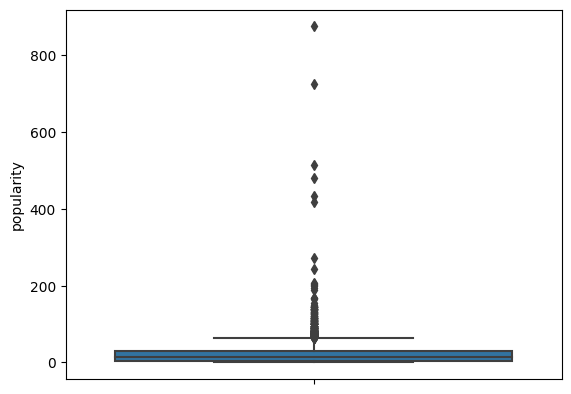

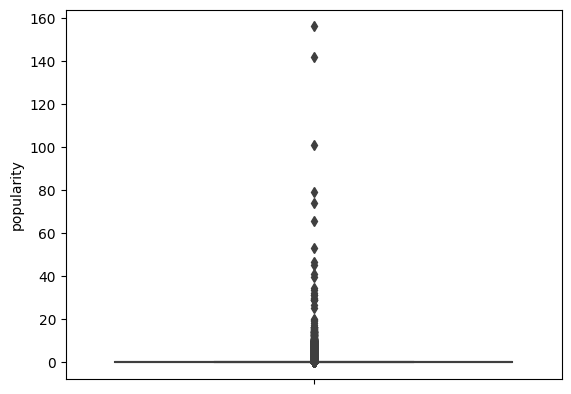

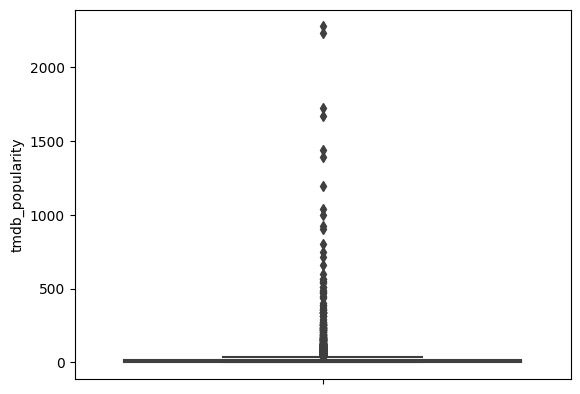

In [42]:
sns.boxplot(y='popularity', data=newdf1)
plt.show()
sns.boxplot(y='popularity', data=newdf2)
plt.show()
sns.boxplot(y='tmdb_popularity', data=newdf3)
plt.show()
#ok we will be using standard scaler anyway

# **Concatenating DFs**

In [43]:
newdf1.columns = ['title', 'genres', 'release_date', 'vote_average', 'vote_count','popularity']
newdf2.columns = ['title', 'genres', 'release_date', 'vote_average', 'vote_count','popularity']
newdf3.columns = ['title', 'genres', 'release_date', 'vote_average', 'vote_count','popularity']

In [44]:
resultdf = pd.concat([newdf1,newdf2,newdf3], axis=0)

In [45]:
resultdf.shape

(212553, 6)

In [46]:
resultdf.describe()

,vote_average,vote_count,popularity
count,212553.000000,2.125530e+05,211928.000000
mean,3.277577,6.273773e+02,1.236853
std,3.187359,1.564204e+04,14.927038
min,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,0.000857
50%,4.000000,1.000000e+00,0.009566
75%,6.000000,4.000000e+00,0.147888
max,10.000000,2.294231e+06,2274.044000


In [47]:
resultdf.head()

,title,genres,release_date,vote_average,vote_count,popularity
0,Avatar,"[ACTION, ADVENTURE, FANTASY, SCIENCE FICTION]",2009,7.2,11800.0,150.437577
1,Pirates of the Caribbean: At World's End,"[ADVENTURE, FANTASY, ACTION]",2007,6.9,4500.0,139.082615
2,Spectre,"[ACTION, ADVENTURE, CRIME]",2015,6.3,4466.0,107.376788
3,The Dark Knight Rises,"[ACTION, CRIME, DRAMA, THRILLER]",2012,7.6,9106.0,112.312950
4,John Carter,"[ACTION, ADVENTURE, SCIENCE FICTION]",2012,6.1,2124.0,43.926995


# **Decided on using Cosine Similarity**

In [48]:
from sklearn.preprocessing import StandardScaler
resultdf.popularity = StandardScaler().fit_transform(resultdf.popularity.values.reshape(-1,1))
resultdf.head()

,title,genres,release_date,vote_average,vote_count,popularity
0,Avatar,"[ACTION, ADVENTURE, FANTASY, SCIENCE FICTION]",2009,7.2,11800.0,9.995357
1,Pirates of the Caribbean: At World's End,"[ADVENTURE, FANTASY, ACTION]",2007,6.9,4500.0,9.234658
2,Spectre,"[ACTION, ADVENTURE, CRIME]",2015,6.3,4466.0,7.110599
3,The Dark Knight Rises,"[ACTION, CRIME, DRAMA, THRILLER]",2012,7.6,9106.0,7.441286
4,John Carter,"[ACTION, ADVENTURE, SCIENCE FICTION]",2012,6.1,2124.0,2.859927


In [49]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
data_genres = pd.DataFrame(mlb.fit_transform(resultdf['genres']), columns=mlb.classes_, index=resultdf.index)
resultdf = pd.concat([resultdf, data_genres], axis=1)
resultdf.head()

,title,genres,release_date,vote_average,vote_count,popularity,ACTION,ADVENTURE,ANIMATION,COMEDY,...,MYSTERY,REALITY,ROMANCE,SCIENCE FICTION,SCIFI,SPORT,THRILLER,TV MOVIE,WAR,WESTERN
0,Avatar,"[ACTION, ADVENTURE, FANTASY, SCIENCE FICTION]",2009,7.2,11800.0,9.995357,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,"[ADVENTURE, FANTASY, ACTION]",2007,6.9,4500.0,9.234658,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,"[ACTION, ADVENTURE, CRIME]",2015,6.3,4466.0,7.110599,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,"[ACTION, CRIME, DRAMA, THRILLER]",2012,7.6,9106.0,7.441286,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,John Carter,"[ACTION, ADVENTURE, SCIENCE FICTION]",2012,6.1,2124.0,2.859927,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate

train_data, test_data = train_test_split(resultdf, test_size=0.2, random_state=42)

title_input = Input(shape=(1,), name='title_input')
genres_input = Input(shape=(len(mlb.classes_),), name='genres_input')
release_date_input = Input(shape=(1,), name='release_date_input')
vote_average_input = Input(shape=(1,), name='vote_average_input')
vote_count_input = Input(shape=(1,), name='vote_count_input')
popularity_input = Input(shape=(1,), name='popularity_input')

title_embedding = Embedding(input_dim=len(resultdf), output_dim=50)(title_input)
title_flatten = Flatten()(title_embedding)

concatenated = Concatenate()([title_flatten, genres_input, release_date_input, vote_average_input, vote_count_input, popularity_input])

dense1 = Dense(128, activation='relu')(concatenated)
dense2 = Dense(64, activation='relu')(dense1)
output = Dense(len(resultdf), activation='softmax')(dense2)

model = Model(inputs=[title_input, genres_input, release_date_input, vote_average_input, vote_count_input, popularity_input], outputs=output)

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

X_train = [train_data['title'], train_data.iloc[:, 6:], train_data['release_date'], train_data['vote_average'], train_data['vote_count'], train_data['popularity']]
y_train = pd.get_dummies(train_data['title'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

X_test = [test_data['title'], test_data.iloc[:, 6:], test_data['release_date'], test_data['vote_average'], test_data['vote_count'], test_data['popularity']]
y_test = pd.get_dummies(test_data['title'])

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')